In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
df.drop(columns=["User ID"],axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
#df.drop_duplicates(inplace=True)
#df

In [7]:
df.duplicated().sum()

20

In [8]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [9]:
#OUTLIERS

In [10]:
import seaborn as sns

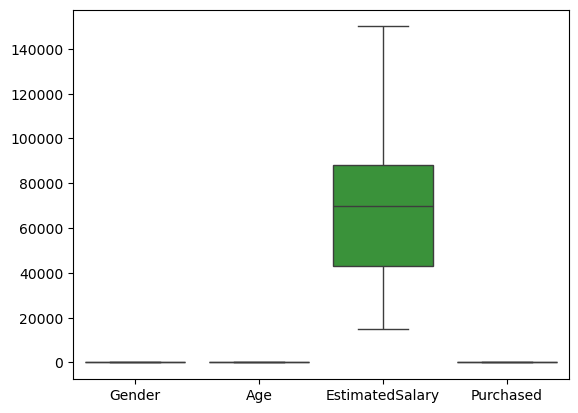

In [11]:
sns.boxplot(df)
plt.show()

In [12]:
x=df[["Gender","Age","EstimatedSalary"]]
y=df["Purchased"]

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

In [41]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=model.predict(x_test)

In [53]:
accuracy=accuracy_score(y_test,y_pred)

In [69]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[50,  2],
       [ 7, 21]], dtype=int64)

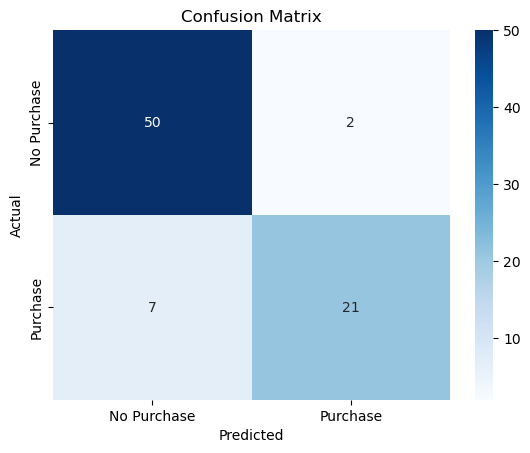

In [63]:
sns.heatmap(conf_matrix,annot=True,cmap="Blues",xticklabels=["No Purchase","Purchase"],yticklabels=["No Purchase","Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()